In [65]:
#downloading the zip file
import requests

base_url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/studentsSets/72427454.zip"
response = requests.get(base_url)

with open("dataset.zip", "wb") as f:
    f.write(response.content)

In [66]:
#I have found, that I can extract zip contents
import zipfile

with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

In [67]:
def process_csv_files(path):
    # Iterate through all files in the provided path
    for file in os.listdir(path):
        file_path = os.path.join(path, file)

        # If the file is a CSV, read and display its content
        if file.endswith(".csv"):
            ticker = file[:-4]  # Remove the ".csv" extension to get the ticker
            data = pd.read_csv(file_path)
            print(f"Ticker: {ticker}")
            print(data.head())
            print("\n")

        # If the file is a directory, search for CSV files within it
        elif os.path.isdir(file_path):
            process_csv_files(file_path)

# Call the function on the "dataset" folder
process_csv_files("dataset")


Ticker: DHR
         Date       High        Low       Open      Close     Volume  \
0  2017-11-13  93.379997  91.839996  92.150002  93.330002  2041000.0   
1  2017-11-14  93.309998  92.480003  92.809998  93.190002  1974800.0   
2  2017-11-15  93.129997  92.419998  93.070000  92.419998  1844100.0   
3  2017-11-16  93.860001  92.320000  92.599998  93.580002  1554000.0   
4  2017-11-17  93.639999  92.800003  93.120003  93.300003  1510500.0   

   Adj Close  
0  91.492851  
1  91.355606  
2  90.600754  
3  91.737923  
4  91.463432  


Ticker: HES
         Date       High        Low       Open      Close     Volume  \
0  2017-11-13  46.900002  45.889999  46.849998  46.590000  3540600.0   
1  2017-11-14  46.410000  44.709999  46.180000  44.910000  5414000.0   
2  2017-11-15  44.270000  43.320000  44.139999  43.669998  5157700.0   
3  2017-11-16  44.680000  43.810001  43.990002  44.090000  4598600.0   
4  2017-11-17  44.910000  44.209999  44.360001  44.549999  3950100.0   

   Adj Close  
0  

In [ ]:
# I have run into trouble here, and I did not manage to finish

In [ ]:
#PART 2

In [43]:
import pandas as pd
data = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
data.head()

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [40]:
#counting number of missing

num_missing_included = data["included"].isnull().sum()
print("Number of companies with missing 'included' date:", num_missing_included)


Number of companies with missing 'included' date: 45


In [ ]:
#there is 45 of them

In [44]:
# Convert the "included" column to datetime format
data["included"] = pd.to_datetime(data["included"], dayfirst=True, errors='coerce')
data["included"].head()

0   1976-08-09
1   2017-07-26
2   1964-03-31
3   2012-12-31
4   2018-05-31
Name: included, dtype: datetime64[ns]

In [48]:
# Remove companies with missing "included" dates
data = data.dropna(subset=["included"])
data.head()

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981


In [50]:
# Calculate the age of each constituent
now = pd.Timestamp.now()
data["age"] = (now - data["included"]).dt.days / 365
data["age"].head()

0    46.643836
1     5.654795
2    59.010959
3    10.224658
4     4.808219
Name: age, dtype: float64

In [53]:
# Find the oldest and youngest constituent
oldest = data.loc[data["age"].idxmax()]
youngest = data.loc[data["age"].idxmin()]
print(oldest)
print(youngest)

Symbol                          MO
Security                    Altria
GICS Sector       Consumer Staples
hq              Richmond, Virginia
included       1957-03-04 00:00:00
Founded                       1985
age                      66.090411
Name: 25, dtype: object
Symbol                        ACGL
Security        Arch Capital Group
GICS Sector             Financials
hq               Hamilton, Bermuda
included       2022-11-01 00:00:00
Founded                       1995
age                       0.383562
Name: 48, dtype: object


In [55]:
# Calculate and print the average age of 
avg_age = data["age"].mean()
print(avg_age)

21.77206318755431


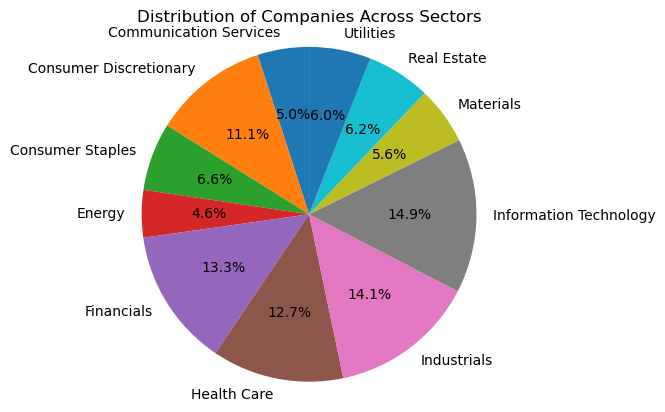

In [61]:

import matplotlib.pyplot as plt
data = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
data.head()

# Group the DataFrame by sector and count the number of companies in each sector
sector_counts = data.groupby("GICS Sector").size()

# Create a pie chart of the sector counts
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribution of Companies Across Sectors")
plt.show()


In [62]:
import pandas as pd

data = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
data.head()

# Extract the state from the "hq" column
data["state"] = data["hq"].str.split(", ").str[-1]

# Describe the distribution of the states
state_counts = data["state"].value_counts()
print(state_counts)


California                             70
New York                               55
Texas                                  45
Illinois                               33
Massachusetts                          22
Pennsylvania                           20
Ohio                                   19
Georgia                                17
North Carolina                         16
Virginia                               16
Florida                                15
New Jersey                             15
Minnesota                              14
Washington                             13
Connecticut                            13
Michigan                               12
Ireland                                 8
Wisconsin                               7
Arizona                                 7
Indiana                                 7
Maryland                                7
Tennessee                               7
Colorado                                7
Missouri                          

In [69]:
import pandas as pd

# Load the main dataset
df_main = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")

# Load the subindustry dataset
df_sub = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv")

# Join the datasets on the "symbol" column
df = pd.merge(df_main, df_sub, on="symbol", how="left")

# Filter the DataFrame by the "Consumer Discretionary" GICS sector
df_cd = df[df["sector"] == "Consumer Discretionary"]

# Describe the distribution of subindustries for the "Consumer Discretionary" GICS sector
sub_counts = df_cd["subindustry"].value_counts()
print(sub_counts)


KeyError: 'symbol'